# Far-Field and Near-Field Analysis
---
Near and Far Field data can be summarized in a report using the near_and_far_field() method.

# Raw Module Data

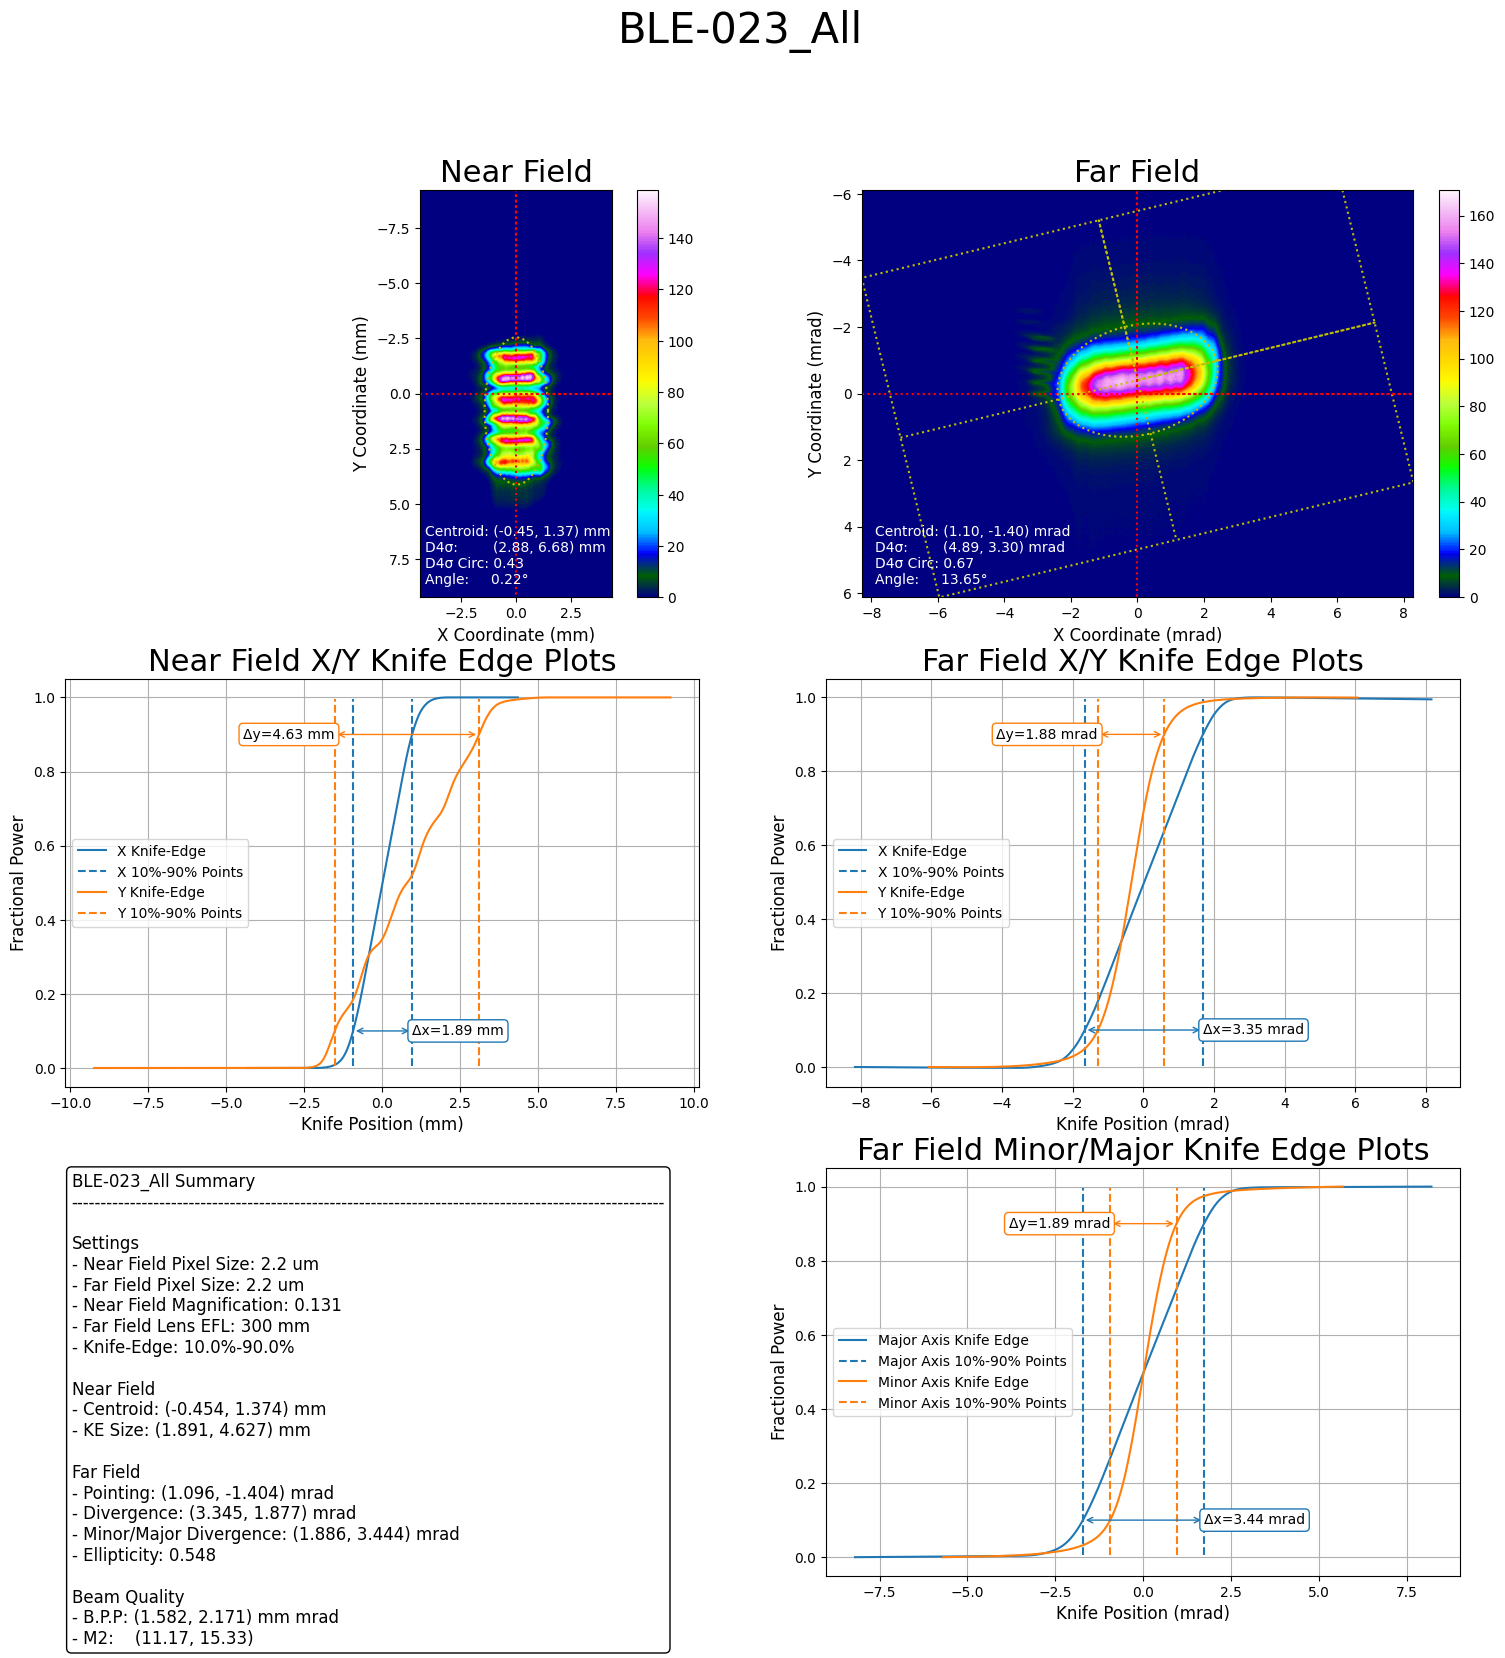

In [3]:
import laserbeamtools as lbt

# Load images into arrays
folder = r'N:/PRODUCTION/BL/BeamExpander/COL-009/BLE-026/RAW'
ff_img = lbt.load_img(folder+'/MODULE_ALL_FF.bmp')
nf_img = lbt.load_img(folder+'/MODULE_ALL_NF.bmp')

# Run analysis method
results = lbt.near_and_far_profiles(nf_img,
                                    ff_img, 
                                    title='BLE-023_All', 
                                    ff_lens=300,
                                    ff_units='mrad',
                                    ffprecrop=0,
                                    ff_pixel_size=2.2,
                                    nf_pixel_size=2.2,
                                    nfprecrop=0.4, 
                                    nf_mag=0.1307, 
                                    nf_scale_down=1000, 
                                    nf_units='mm',
                                    save=True,
                                    ff_int_crop=True,
                                    nf_int_crop=True
                                    )

# Beam Expander Data

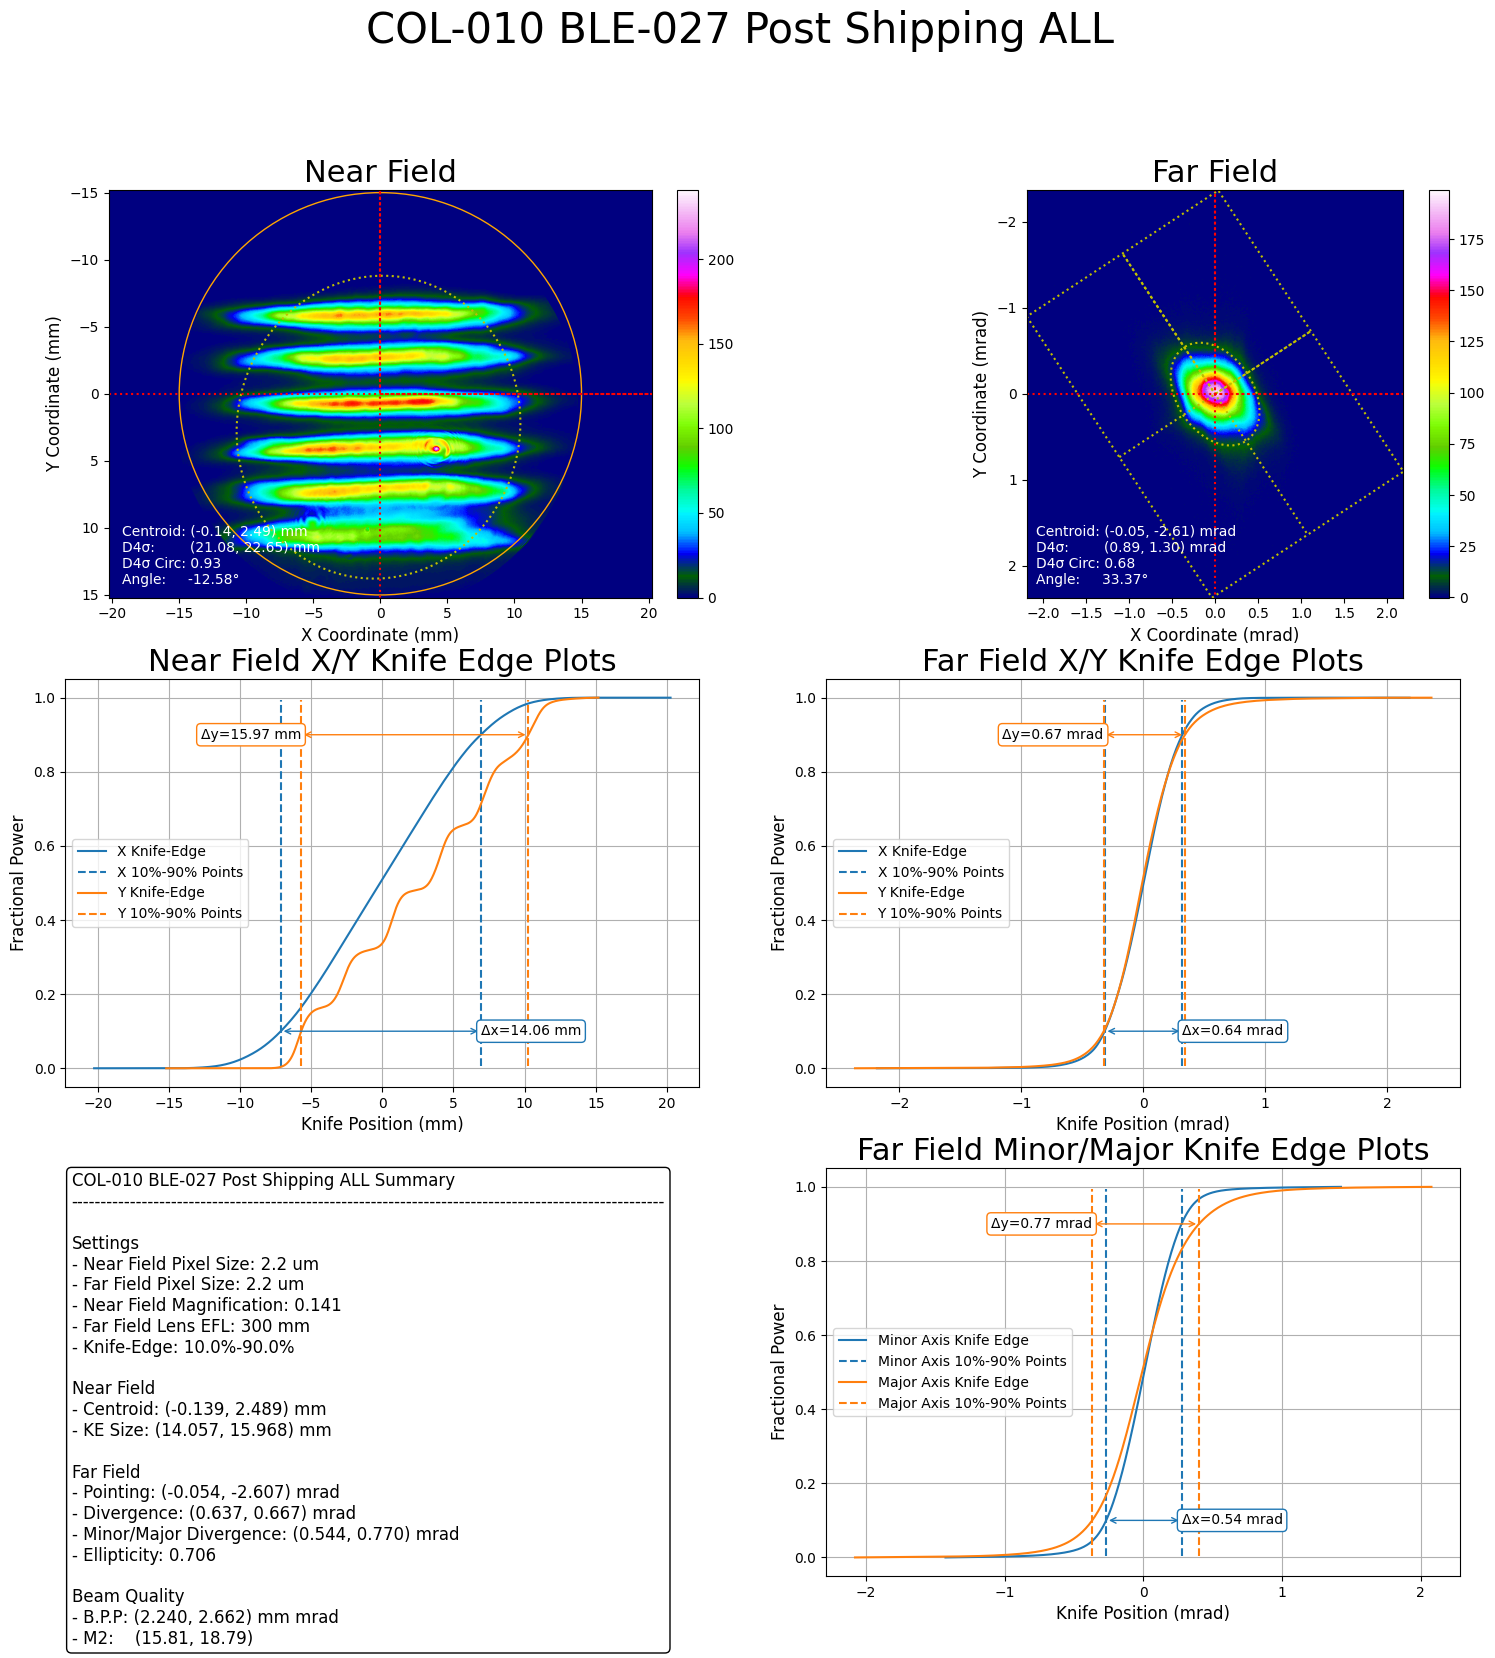

In [1]:
import laserbeamtools as lbt

ch = "ALL"

# Load images into arrays
folder = r'N:\PRODUCTION\BL\BeamExpander\COL-010\BLE-027\POST-SHIPPED IMAGES'
ff_img = lbt.load_img(folder+'/BE_{}_FF.bmp'.format(ch))
nf_img = lbt.load_img(folder+'/BE_{}_NF.bmp'.format(ch))

# Run analysis method
results = lbt.near_and_far_profiles(nf_img,
                                    ff_img, 
                                    title='COL-010 BLE-027 Post Shipping {}'.format(ch), 
                                    ff_lens=300,
                                    ff_units='mrad',
                                    ffprecrop=0,
                                    ff_pixel_size=2.2,
                                    nf_pixel_size=2.2,
                                    nfprecrop=0, 
                                    nf_mag=0.1407, 
                                    nf_scale_down=1000, 
                                    nf_units='mm',
                                    save=False,
                                    save_name=r"",
                                    ff_int_crop=True,
                                    nf_int_crop=False)

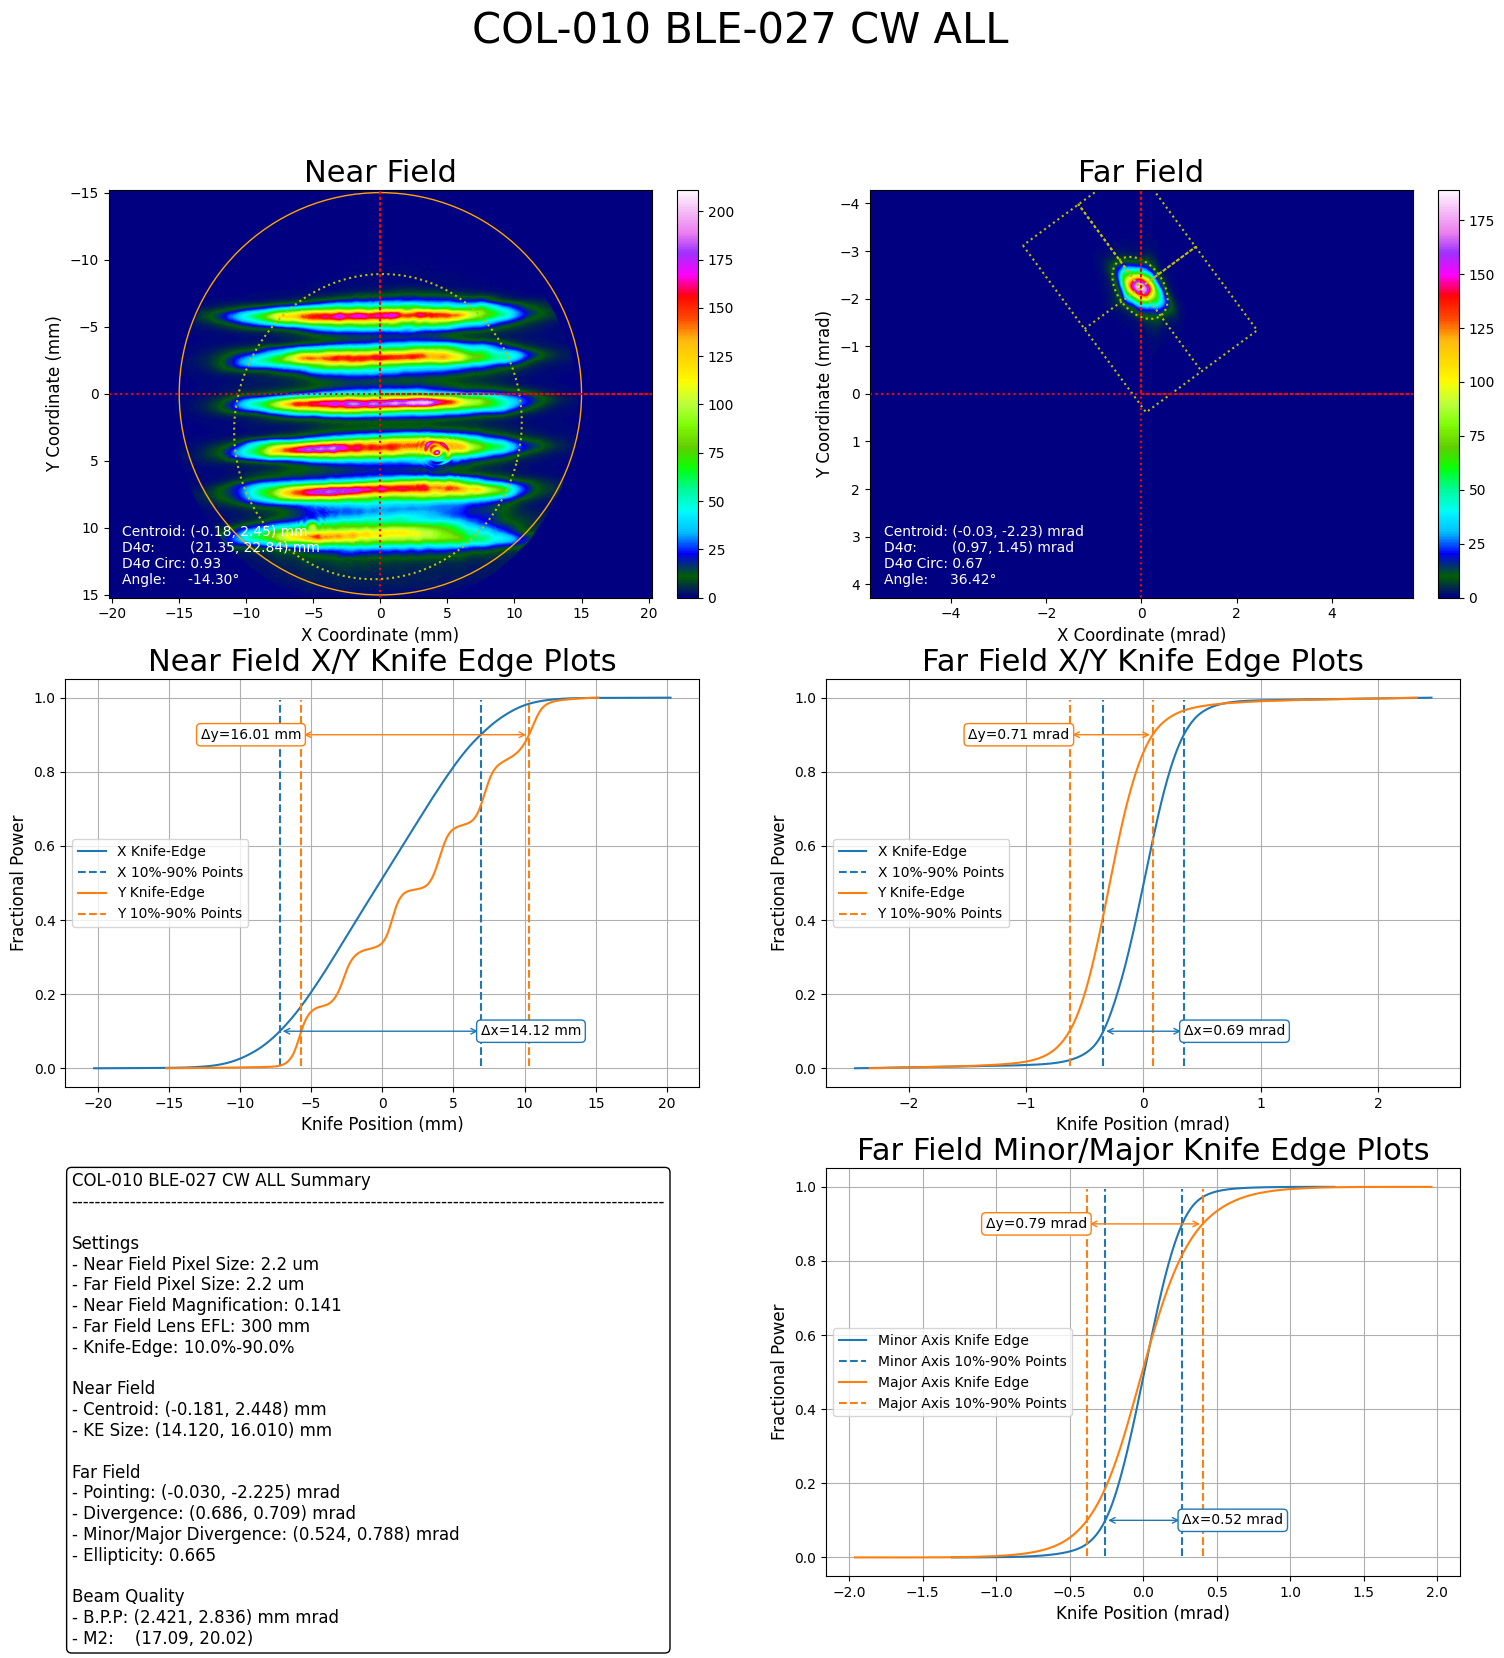

In [2]:
import laserbeamtools as lbt

ch = "ALL"

# Load images into arrays
folder = r'N:/PRODUCTION/BL/BeamExpander/COL-010/BLE-027'
ff_img = lbt.load_img(folder+'/BE_{}_FF.bmp'.format(ch))
nf_img = lbt.load_img(folder+'/BE_{}_NF.bmp'.format(ch))

# Run analysis method
results = lbt.near_and_far_profiles(nf_img,
                                    ff_img, 
                                    title='COL-010 BLE-027 CW {}'.format(ch), 
                                    ff_lens=300,
                                    ff_units='mrad',
                                    ffprecrop=0.4,
                                    ff_pixel_size=2.2,
                                    nf_pixel_size=2.2,
                                    nfprecrop=0, 
                                    nf_mag=0.1407, 
                                    nf_scale_down=1000, 
                                    nf_units='mm',
                                    save=False,
                                    save_name=r"",
                                    kep=[0.10,0.90]
                                    )

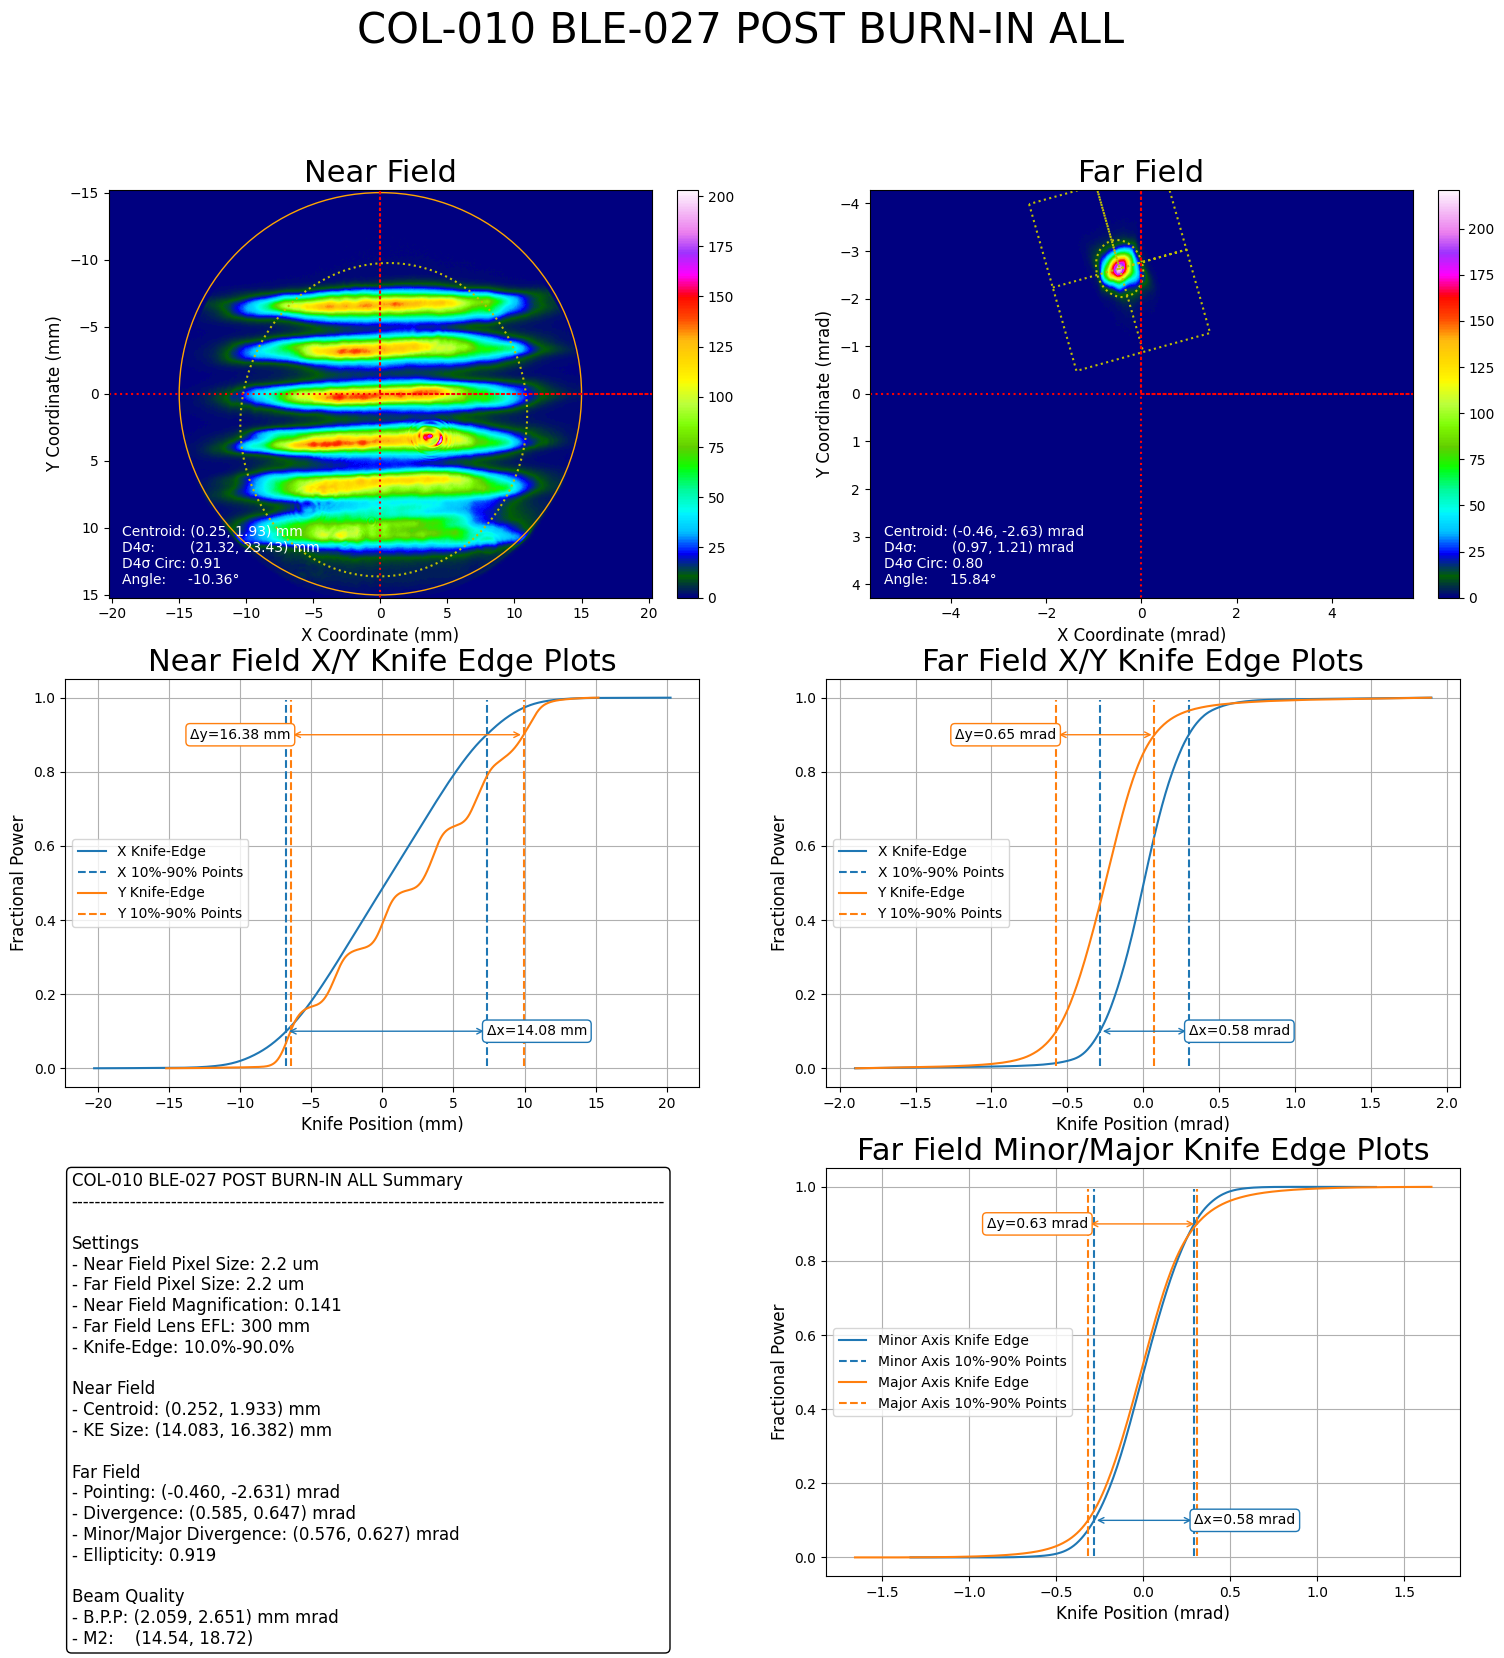

In [3]:
import laserbeamtools as lbt

ch = "ALL"

# Load images into arrays
folder = r'N:/PRODUCTION/BL/BeamExpander/COL-010/BLE-027/POST BURN-IN'
ff_img = lbt.load_img(folder+'/BE_{}_FF.bmp'.format(ch))
nf_img = lbt.load_img(folder+'/BE_{}_NF.bmp'.format(ch))

# Run analysis method
results = lbt.near_and_far_profiles(nf_img,
                                    ff_img, 
                                    title='COL-010 BLE-027 POST BURN-IN {}'.format(ch), 
                                    ff_lens=300,
                                    ff_units='mrad',
                                    ffprecrop=0.4,
                                    ff_pixel_size=2.2,
                                    nf_pixel_size=2.2,
                                    nfprecrop=0, 
                                    nf_mag=0.1407, 
                                    nf_scale_down=1000, 
                                    nf_units='mm',
                                    save=False,
                                    save_name=r"",
                                    kep=[0.10,0.90]
                                    )

# Testing

In [66]:
# pylint: disable=invalid-name
# pylint: disable=too-many-locals
# pylint: disable=too-many-arguments


import numpy as np
import matplotlib.pyplot as plt
import laserbeamtools as lbs
from matplotlib.patches import Circle


class Beam_profile:

    def __init__(self,  img,
                        title='Original',
                        pixel_size=None,
                        units='µm',
                        crop=False,
                        cmap='gist_ncar',
                        corner_fraction=0.035,
                        nT=3,
                        iso_noise=True,
                        **kwargs
                        ):
        """
        Initalizes the beam profile object

        Args:
            img: noise subtracted image
            title: (optional) plot title
            pixel_size: (optional) size of pixels
            units: (optional) string used for units used on axes
            crop: (optional) crop image to integration rectangle
            cmap: (optional) colormap to use
            corner_fraction: (optional) corner fraction for noise
            nT: (optional) the multiple of background noise to remove
            iso_noise: (optional) floor noise option
        """
        if pixel_size is None:
            self.scale = 1
            self.unit_str = ''
            self.units = 'pixels'
        else:
            self.scale = pixel_size
            self.unit_str = units
        self.img = img

        # Create working image
        self.wimg = lbs.subtract_iso_background(self.img,
                                                corner_fraction=corner_fraction,
                                                nT=nT,
                                                iso_noise=iso_noise)
        
        # Plot title
        self.title = title

        # Camera variables
        self.pixel_size = pixel_size
        self.units = units
        self.crop = crop
        self.cmap = cmap

        # Calculation variables
        self.corner_fraction = corner_fraction
        self.nT = nT
        self.iso_noise = iso_noise

        # Arg formatting
        self.bs_args = dict((k, kwargs[k]) for k in ['mask_diameters', 'max_iter', 'phi'] if k in kwargs)
        self.bs_args['iso_noise'] = iso_noise
        self.bs_args['nT'] = nT
        self.bs_args['corner_fraction'] = corner_fraction

        # Keep track of ran functions
        self.__ran_beam_size = False
        self.__ran_knife_edge = False

        # Default knife-edge value
        self.kep = [0.05, 0.95]

        return

    def precrop(self, precrop_fraction=0.6) -> None:
        """
        Pre-crop the image before performing any data analysis.rst

        Args:
            frac: (optional) fraction to crop the image to.
        """
        # Check that the value is within  limits
        if precrop_fraction < 0 or precrop_fraction > 0.9:
            raise ValueError('precrop_fraction must be positive and less than 0.9.')

        # Crop half width
        crop_frac_hw = precrop_fraction/2

        # Crop image
        vv,hh = self.img.shape
        vd = int(vv * crop_frac_hw)
        hd = int(hh * crop_frac_hw)
        self.wimg = self.img[vd:(vv-vd), hd:(hh-hd)]

        # Subtract background
        self.wimg = lbs.subtract_iso_background(self.wimg,
                                                corner_fraction=self.corner_fraction,
                                                nT=self.nT,
                                                iso_noise=self.iso_noise)

        return None

    def beam_size(self) -> None:
        """
        Runs beam size calculation given the parameters used in init.        
        """
        # Beam size
        self.x, self.y, self.dx, self.dy, self.phi = lbs.beam_size(self.wimg, **self.bs_args)

        # Scaled values
        self.vv,self.hh = self.wimg.shape
        self.v_s = self.vv * self.scale
        self.h_s = self.hh * self.scale
        self.x_s = self.x * self.scale
        self.y_s = self.y * self.scale
        self.dx_s = self.dx * self.scale
        self.dy_s = self.dy * self.scale
        self.major_s = np.max([self.dx_s, self.dy_s])
        self.minor_s = np.min([self.dx_s, self.dy_s])

        # Absolute coords
        self.v_s_ = self.v_s 
        self.h_s_ = self.h_s 
        self.x_ = self.x
        self.y_ = self.y
        self.x_s_ = self.x_s
        self.y_s_ = self.y_s

        # Function ran
        self.__ran_beam_size = True

        return None

    def knife_edge(self, kep=[0.05,0.95], rotate=False) -> None:
        """
        Knife edge calculation.

        Args:
            kep: (optional) fractional knife edge points, default is 5%-95%
            rotate: (optional) rotate the image to orient the major/minor axis along the knife edge
        """
        # Run beam size if it hasn't been ran already
        if self.__ran_beam_size == False:
            self.beam_size()
        
        # Working image
        self.mwimg = np.copy(self.wimg)
        
        # Apply mask
        # self.mwimg[mask < 0] = 0
        self.kep = kep
        # Rotated image
        if rotate:
            img_r = lbs.rotate_image(self.mwimg, self.x, self.y, -self.phi)
            x_r_, y_r_, dx_r_, dy_r_, _ = lbs.beam_size(img_r, **self.bs_args)
            img_r, _, _  = lbs.crop_image_to_integration_rect(img_r, x_r_, y_r_, dx_r_, dy_r_, 0)
            # x_r, y_r, dx_r, dy_r, phi_r = lbs.beam_size(img_r, **bs_args)
        else:
            img_r = np.copy(self.mwimg)
            x_r_, y_r_, dx_r_, dy_r_, _ = lbs.beam_size(img_r, **self.bs_args)
            img_r, _, _  = lbs.crop_image_to_integration_rect(img_r, x_r_, y_r_, dx_r_, dy_r_, self.phi)
            # x_r, y_r, dx_r, dy_r, phi_r = lbs.beam_size(img_r, **bs_args)

        # X knife-edge
        self.xax_ke_y, self.xax_ke_x, self.xkep = lbs.knife_edge(img_r, axis=0, kep=self.kep)
        self.xkep = self.xkep - np.average(self.xax_ke_x)
        self.xax_ke_x = self.xax_ke_x - np.average(self.xax_ke_x)

        # Y knife-edge
        self.yax_ke_y, self.yax_ke_x, self.ykep = lbs.knife_edge(img_r, axis=1, kep=self.kep)
        self.ykep = self.ykep - np.average(self.yax_ke_x)
        self.yax_ke_x = self.yax_ke_x - np.average(self.yax_ke_x)

        # Knife edge widths
        self.x_kew = (self.xkep[1]-self.xkep[0]) * self.scale
        self.y_kew = (self.ykep[1]-self.ykep[0]) * self.scale

        # Knife edge circularity
        self.circ = np.min([self.x_kew, self.y_kew]) / np.max([self.x_kew, self.y_kew])

        # Function ran
        self.__ran_knife_edge = True

        return None
    
    def crop_to_int(self) -> None:
        """
        Crop the array to just the integration region
        """
        self.wimg, self.x, self.y  = lbs.crop_image_to_integration_rect(self.wimg, self.x, self.y, self.dx, self.dy, self.phi)
        self.vv,self.hh = self.wimg.shape
        self.v_s = self.vv * self.scale
        self.h_s = self.hh * self.scale
        self.x_s = self.x * self.scale
        self.y_s = self.y * self.scale
        return None
    
    def gen_rotated(self) -> None:
        """
        Generate rotated object.
        """

        # img_r, _, _  = lbs.crop_image_to_integration_rect(self.mwimg, self.x, self.y, self.dx, self.dy, self.phi)
        # plt.figure(2)
        # plt.imshow(img_r)
        # vv_r,hh_r = self.wimg
        img_r = lbs.rotate_image(self.wimg, self.x, self.y, -self.phi)
        # plt.figure(3)
        # plt.imshow(img_r)

        self.rotated = Beam_profile(img_r,
                        title=self.title+' Rotated',
                        pixel_size=self.pixel_size,
                        units=self.units,
                        crop=self.crop,
                        cmap=self.cmap,
                        **self.bs_args)
                                
        return None

def near_and_far_profiles(nf_img, ff_img, title='COL-XX', 
                          nf_pixel_size=2.2, nf_mag=0.59, nf_scale_down=1000, nf_units='µm', 
                          ff_pixel_size=2.2, ff_lens=80, ff_units='mrad', 
                          kep=[0.10,0.90], ffprecrop=0.7, nfprecrop=0.0, 
                          save=True, save_name="", show_plt=True,
                          ff_nT=4, nf_nT=4, ff_iso=True, nf_iso=False,
                          ff_int_crop=False, nf_int_crop=False):
    """
    Generate report of near and far field images.

    Args:
        nf_img: near field array data
        ff_img: far field array data
        title: (optional) title for plot
        nf_pixel_size: (optional) near field pixel size
        nf_mag: (optional) near field magnification factor
        nf_scale_down: (optional) scaling factor for converting units of nf
        nf_units: (optional) units for near field image
        ff_pixel_size: (optional) far field pixel size
        ff_lens: (optional) far field lens focal length
        ff_units: (optional) far field units
        kep: (optional) knife-edge points
        ffprecrop: (optional) precrop factor for far field image
        nfprecrop: (optional) precrop factor for near field image
        save: (optional) save option
        save_name: (optional) name to save file as
        show_plt: (optional) show the plot

    Returns:
        s_data_str: data string of the summary data

    """
    # small font size
    sf = 12
    
    # Create beam profile objects
    nf = Beam_profile(nf_img, title='Near Field', pixel_size=nf_pixel_size/(nf_mag*nf_scale_down), units=nf_units, iso_noise=nf_iso, nT=nf_nT)
    ff = Beam_profile(ff_img, title='Far Field', pixel_size=(ff_pixel_size/ff_lens), units=ff_units, iso_noise=ff_iso, nT=ff_nT)
    
    # pre cropping
    if nfprecrop > 0.0:
        nf.precrop(nfprecrop)
    if ffprecrop > 0.0:
        ff.precrop(ffprecrop)

    # Beam size calculations
    nf.beam_size()
    ff.beam_size()

    # Crop to integration region
    if nf_int_crop:
        nf.crop_to_int()
    if ff_int_crop:
        ff.crop_to_int()

    # Knife-edge objects
    nf.knife_edge(kep)
    ff.knife_edge(kep)

    # Rotated plots
    ff.gen_rotated()
    ff.rotated.beam_size()
    ff.rotated.knife_edge(kep)

    # Create subplots
    fig, axs = plt.subplots(3, 2, figsize=(18, 18))
    fig.suptitle(title, fontsize=30)

    for i, xf in enumerate([nf,ff]):

        # Plot image
        extent = np.array([-xf.h_s/2, xf.h_s/2, xf.v_s/2, -xf.v_s/2])
        im = axs[0,i].imshow(xf.wimg, extent=extent, cmap=xf.cmap)
        plt.colorbar(im, ax=axs[0,i], fraction=0.046 * xf.v_s / xf.h_s, pad=0.04)

        # Ellipse array
        xp,yp = lbs.ellipse_arrays(xf.x, xf.y, xf.dx, xf.dy, xf.phi) * xf.scale
        axs[0,i].plot(xp-xf.h_s/2,yp-xf.v_s/2,':y')

        if i == 1:
            # Rectangular array
            xp,yp = lbs.rotated_rect_arrays(xf.x, xf.y, xf.dx, xf.dy, xf.phi) * xf.scale
            axs[0,i].plot(xp-xf.h_s/2,yp-xf.v_s/2,':y')

            # Axes array
            xp, yp = lbs.axes_arrays(xf.x, xf.y, xf.dx, xf.dy, xf.phi) * xf.scale
            axs[0,i].plot(xp-xf.h_s/2,yp-xf.v_s/2,':y')

        # Crosshair array
        xp, yp = lbs.axes_arrays(xf.hh/2, xf.vv/2, xf.hh/3, xf.vv/3, 0) * xf.scale
        axs[0,i].plot(xp-xf.h_s/2,yp-xf.v_s/2,':r')#,linewidth=1)

        # Plot formatting
        axs[0,i].set_title(xf.title, fontsize=22)
        axs[0,i].set_xlim(-xf.h_s/2, xf.h_s/2)
        axs[0,i].set_ylim(xf.v_s/2, -xf.v_s/2)
        axs[0,i].set_xlabel("X Coordinate (%s)" % xf.unit_str, fontsize=sf)
        axs[0,i].set_ylabel("Y Coordinate (%s)" % xf.unit_str, fontsize=sf)

        # Beam stats
        m1 = 'Centroid: (%.2f, %.2f) %s' % (xf.x_*xf.scale - xf.h_s_/2, xf.y_*xf.scale - xf.v_s_/2, xf.unit_str)
        m2 = 'D4\u03C3:        (%.2f, %.2f) %s' % (xf.dx_s, xf.dy_s, xf.unit_str)
        m3 = 'D4\u03C3 Circ: %.2f' % (xf.minor_s/xf.major_s)
        m4 = 'Angle:     %.2f\N{DEGREE SIGN}' % (xf.phi*180/np.pi)
        axs[0,i].text(-xf.h_s/2 * 0.95, xf.v_s/2*0.95, '\n'.join([m1,m2,m3,m4]), va='bottom', ha='left',c='white',fontsize=10)

        # Knife-edge plots x
        # --------------------------------------------- #
        axs[1,i].set_title(xf.title + ' X/Y Knife Edge Plots', fontsize=22)
        axs[1,i].set_xlabel("Knife Position (%s)" % xf.unit_str, fontsize=sf)
        axs[1,i].set_ylabel("Fractional Power", fontsize=sf)
        axs[1,i].grid('on')

        color = 'tab:blue'
        axs[1,i].plot(xf.xax_ke_x * xf.scale, xf.xax_ke_y, color=color, label='X Knife-Edge')
        
        # Plot lines
        axs[1,i].axvline(x=xf.xkep[0] * xf.scale, ymin=0.05, ymax=0.95, color=color, label='X {:.0f}%-{:.0f}% Points'.format(kep[0]*100, kep[1]*100), ls='--')
        axs[1,i].axvline(x=xf.xkep[1] * xf.scale, ymin=0.05, ymax=0.95, color=color, ls='--')

        # Show distance on plot
        x_w = (xf.xkep[1]-xf.xkep[0]) * xf.scale
        axs[1,i].annotate('', (xf.xkep[0] * xf.scale, kep[0]), (xf.xkep[1] * xf.scale, kep[0]), arrowprops=dict(arrowstyle= '<->',color=color))
        axs[1,i].text(np.average(xf.xkep[1]) * xf.scale, kep[0], 'Δx=%.2f %s' % (x_w, xf.unit_str), va='center', ha='left',
                      bbox=dict(facecolor='white', edgecolor=color, boxstyle='round'))

        # Knife-edge plots y
        # --------------------------------------------- #
        color = 'tab:orange'
        axs[1,i].plot(xf.yax_ke_x * xf.scale, xf.yax_ke_y, color=color, label='Y Knife-Edge')
        
        # Plot lines
        axs[1,i].axvline(x=xf.ykep[0] * xf.scale, ymin=0.05, ymax=0.95, color=color, label='Y {:.0f}%-{:.0f}% Points'.format(kep[0]*100, kep[1]*100), ls='--')
        axs[1,i].axvline(x=xf.ykep[1] * xf.scale, ymin=0.05, ymax=0.95, color=color, ls='--')

        y_w = (xf.ykep[1]-xf.ykep[0]) * xf.scale
        axs[1,i].annotate('', (xf.ykep[0] * xf.scale, kep[1]), (xf.ykep[1] * xf.scale, kep[1]), arrowprops=dict(arrowstyle= '<->',color=color))
        axs[1,i].text(np.average(xf.ykep[0]) * xf.scale, kep[1], 'Δy=%.2f %s' % (y_w, xf.unit_str), va='center', ha='right',
                      bbox=dict(facecolor='white', edgecolor=color, boxstyle='round'))

        # Knife-edge plot legend
        axs[1,i].legend(loc='center left')

    # Rotated Far Field Plot
    # =============================================== #
    axs[2,1].set_title(ff.title + ' Minor/Major Knife Edge Plots', fontsize=22)
    axs[2,1].set_xlabel("Knife Position (%s)" % ff.rotated.unit_str, fontsize=sf)
    axs[2,1].set_ylabel("Fractional Power", fontsize=sf)
    axs[2,1].grid('on')

    # Determine major or minor
    if ff.rotated.x_kew > ff.rotated.y_kew:
        xlabel = 'Major Axis'
        ylabel = 'Minor Axis'
    else:
        ylabel = 'Major Axis'
        xlabel = 'Minor Axis'

    color = 'tab:blue'
    axs[2,1].plot(ff.rotated.xax_ke_x * ff.rotated.scale, ff.rotated.xax_ke_y, color=color, label=xlabel + ' Knife Edge')
    
    arrowprops=dict(arrowstyle= '<|-|>',color='blue',lw=3.5,ls='--')
    # Plot lines
    axs[2,1].axvline(x=ff.rotated.xkep[0] * ff.rotated.scale, ymin=0.05, ymax=0.95, color=color, label=xlabel + ' {:.0f}%-{:.0f}% Points'.format(ff.kep[0]*100, ff.kep[1]*100), ls='--')
    axs[2,1].axvline(x=ff.rotated.xkep[1] * ff.rotated.scale, ymin=0.05, ymax=0.95, color=color, ls='--')

    # Show distance on plot
    axs[2,1].annotate('', (ff.rotated.xkep[0] * ff.rotated.scale, kep[0]), (ff.rotated.xkep[1] * ff.rotated.scale, ff.rotated.kep[0]), arrowprops=dict(arrowstyle= '<->',color=color))
    axs[2,1].text(np.average(ff.rotated.xkep[1]) * ff.rotated.scale, ff.rotated.kep[0], 'Δx=%.2f %s' % (ff.rotated.x_kew, ff.unit_str), va='center', ha='left',
                bbox=dict(facecolor='white', edgecolor=color, boxstyle='round'))

    color = 'tab:orange'
    axs[2,1].plot(ff.rotated.yax_ke_x * ff.rotated.scale, ff.rotated.yax_ke_y, color=color, label=ylabel + ' Knife Edge')
    
    # Plot lines
    axs[2,1].axvline(x=ff.rotated.ykep[0] * ff.rotated.scale, ymin=0.05, ymax=0.95, color=color, label=ylabel + ' {:.0f}%-{:.0f}% Points'.format(ff.kep[0]*100, ff.kep[1]*100), ls='--')
    axs[2,1].axvline(x=ff.rotated.ykep[1] * ff.rotated.scale, ymin=0.05, ymax=0.95, color=color, ls='--')

    axs[2,1].annotate('', (ff.rotated.ykep[0] * ff.rotated.scale, kep[1]), (ff.rotated.ykep[1] * ff.rotated.scale, kep[1]), arrowprops=dict(arrowstyle= '<->',color=color))
    axs[2,1].text(np.average(ff.rotated.ykep[0]) * ff.rotated.scale, kep[1], 'Δy=%.2f %s' % (ff.rotated.y_kew, ff.rotated.unit_str), va='center', ha='right',
                bbox=dict(facecolor='white', edgecolor=color, boxstyle='round'))
    
    # Legend
    axs[2,1].legend(loc='center left')

    # Near Field Circle
    circ = Circle((0,0),15, fc='None', edgecolor='orange')
    axs[0,0].add_patch(circ)

    operator = 'Ryan Robinson'
    summary_data = []
    l0 = title + ' Summary'
    l01 ='-----------------------------------------------------------------------------------------------------'

    s1 = '\nSettings'
    # s2 = 'Operator: %s' % operator
    # s3 = 'Directory: '
    # s4 = 'Run Date: '
    # s5 = 'Software Version: '
    s5 = '- Near Field Pixel Size: %.1f um' % nf_pixel_size
    s6 = '- Far Field Pixel Size: %.1f um' % ff_pixel_size
    s7 = '- Near Field Magnification: %.3f' % nf_mag
    s8 = '- Far Field Lens EFL: %.0f mm' % ff_lens
    s9 = '- Knife-Edge: {}%-{}%'.format((kep[0]*100), (kep[1]*100))


    l1 = '\nNear Field'
    l2 = '- Centroid: (%.3f, %.3f) %s' % (nf.x_*nf.scale - nf.h_s_/2, nf.y_*nf.scale - nf.v_s_/2, nf.unit_str)
    l3 = '- KE Size: (%.3f, %.3f) %s' % (nf.x_kew, nf.y_kew, nf.unit_str)

    lf1 = '\nFar Field'
    lf2 = '- Pointing: (%.3f, %.3f) %s' % (ff.x_*ff.scale - ff.h_s_/2, ff.y_*ff.scale - ff.v_s_/2, ff.unit_str)
    lf3 = '- Divergence: (%.3f, %.3f) %s' % (ff.x_kew, ff.y_kew, ff.unit_str)
    lf4 = '- Minor/Major Divergence: (%.3f, %.3f) %s' % (np.min([ff.rotated.x_kew, ff.rotated.y_kew]), np.max([ff.rotated.x_kew, ff.rotated.y_kew]), ff.rotated.unit_str)
    lf5 = '- Ellipticity: %.3f' % ff.rotated.circ

    lb1 = '\nBeam Quality'
    xbpp = (ff.x_kew * nf.x_kew) / 4
    ybpp = (ff.y_kew * nf.y_kew) / 4
    lb2 = '- B.P.P: (%.3f, %.3f) %s %s' % (xbpp, ybpp, nf.unit_str, ff.unit_str)
    ms = 7.06
    lb3 = '- M2:    (%.2f, %.2f)' % (xbpp*ms, ybpp*ms)

    s_data = [l0, l01, 
              s1, s5, s6, s7, s8, s9, 
              l1, l2, l3, 
              lf1, lf2, lf3, lf4, lf5, 
              lb1, lb2, lb3]
    
    s_data_str = '\n'.join(s_data)

    axs[2,0].text(0.01, 0.99, s_data_str, va='top', ha='left', fontsize=12, bbox=dict(facecolor='None', edgecolor='black', boxstyle='round'))
    axs[2,0].axis('off')

    if save:
        if save_name == "":
            plt.savefig(title + '.png')
        else:
            plt.savefig(save_name)
    
    if show_plt:
        plt.show()

    return s_data_str




import laserbeamtools as lbt

ch = "ALL"

# Load images into arrays
folder = r'N:/PRODUCTION/BL/BeamExpander/COL-010/BLE-027/POST BURN-IN'
ff_img = lbt.load_img(folder+'/BE_{}_FF.bmp'.format(ch))
nf_img = lbt.load_img(folder+'/BE_{}_NF.bmp'.format(ch))

# Run analysis method
results = lbt.near_and_far_profiles(nf_img,
                                    ff_img, 
                                    title='COL-010 BLE-027 POST BURN-IN {}'.format(ch), 
                                    ff_lens=300,
                                    ff_units='mrad',
                                    ffprecrop=0,
                                    ff_pixel_size=2.2,
                                    nf_pixel_size=2.2,
                                    nfprecrop=0, 
                                    nf_mag=0.1407, 
                                    nf_scale_down=1000, 
                                    nf_units='mm',
                                    save=False,
                                    save_name=r"",
                                    kep=[0.10,0.90],
                                    nf_nT=4, ff_nT=4,
                                    ff_int_crop=True
                                    )

TypeError: near_and_far_profiles() got an unexpected keyword argument 'nf_nT'

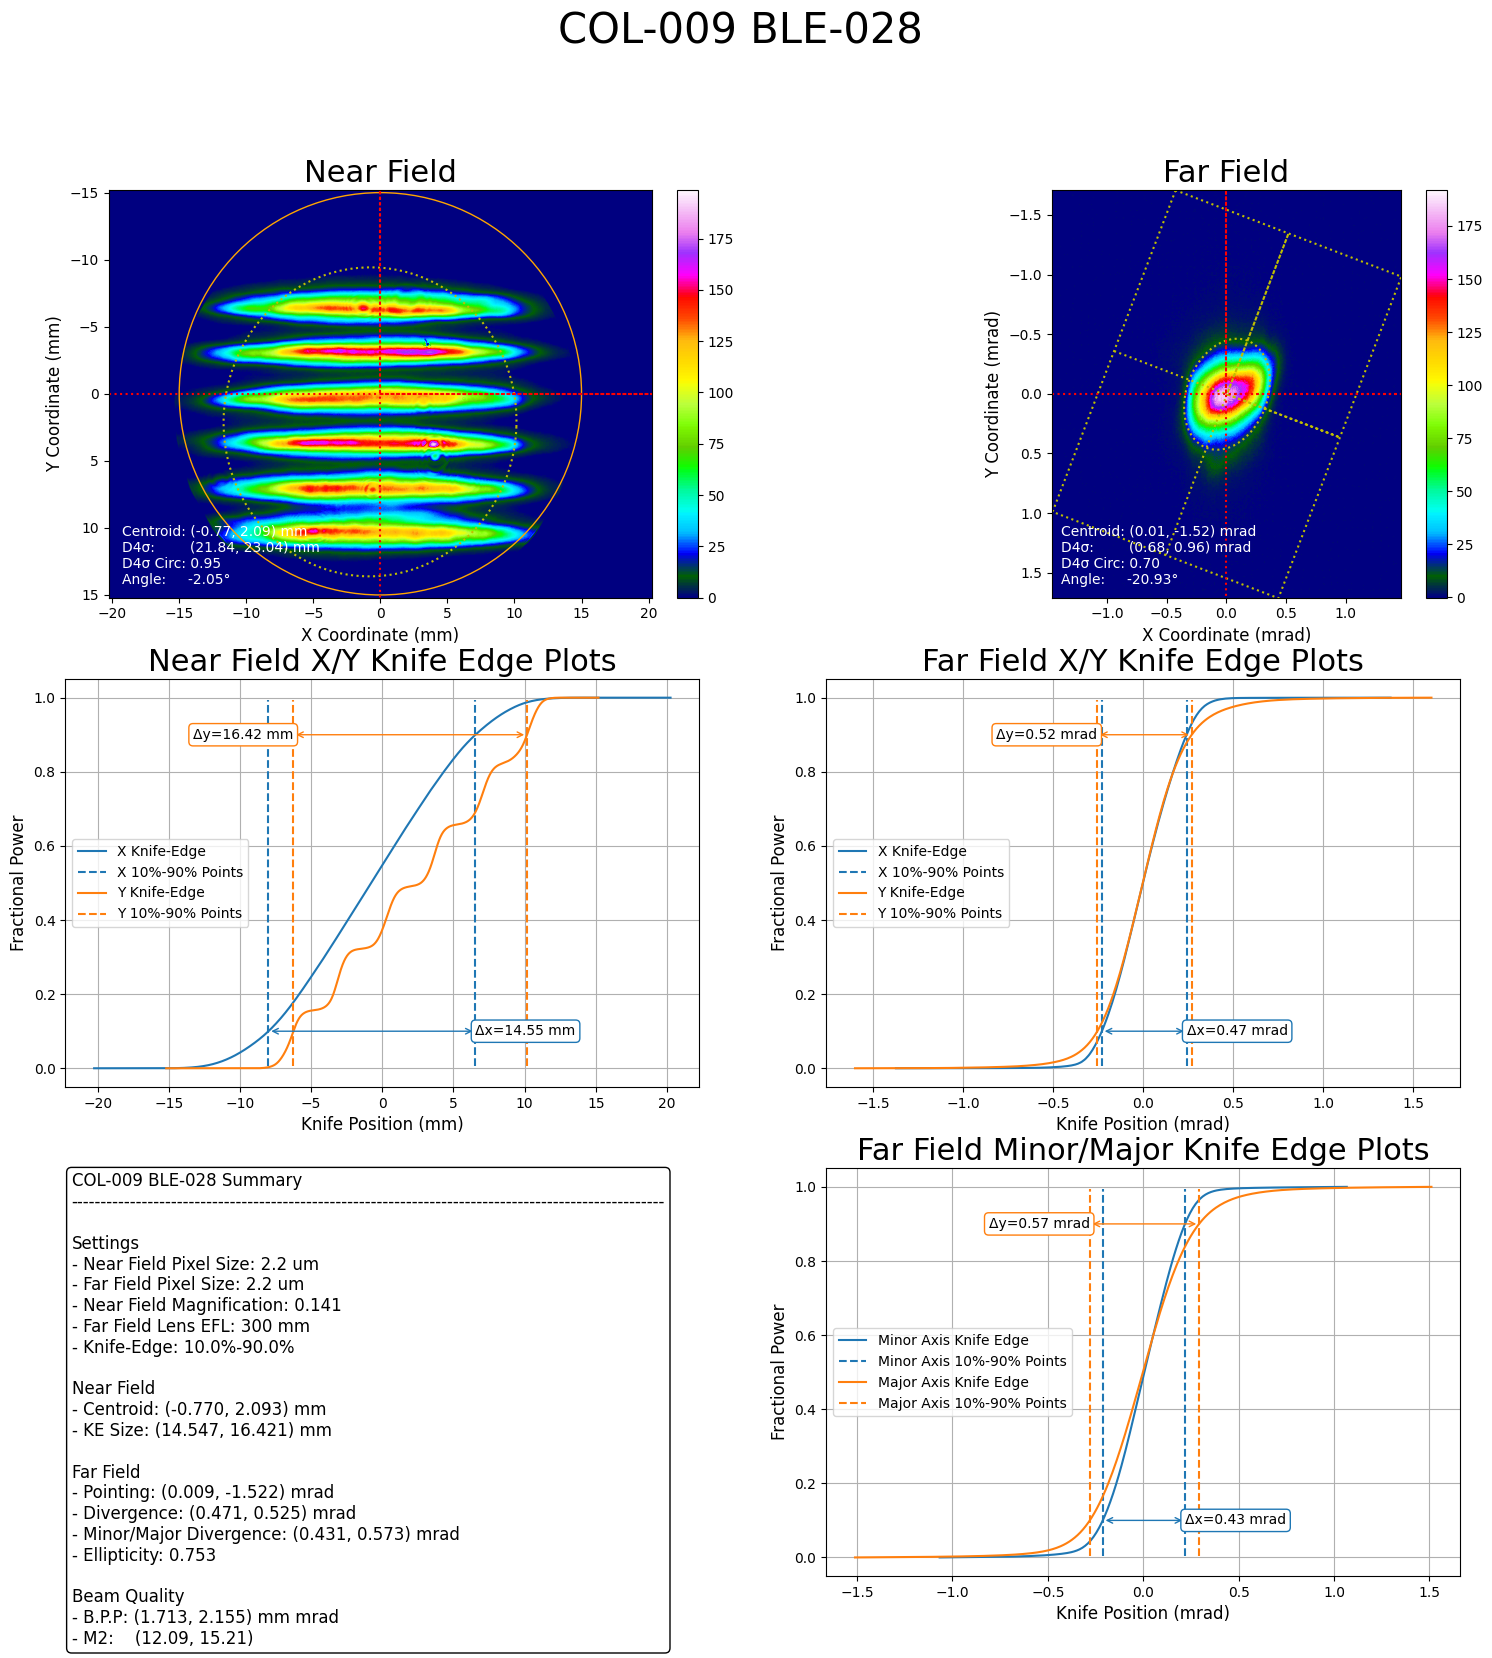

In [28]:
import laserbeamtools as lbt

# ch = "ALL"
ch = "ALL"

# Load images into arrays
# folder = r'N:/PRODUCTION/BL/BeamExpander/COL-010/BLE-027'

folder = r'N:/PRODUCTION/BL/BeamExpander/COL-009/BLE-028'

ff_img = lbt.load_img(folder+'/BE_{}_FF_100%.bmp'.format(ch))
nf_img = lbt.load_img(folder+'/BE_{}_NF_100%.bmp'.format(ch))

# Run analysis method
results = lbt.near_and_far_profiles(nf_img,
                                    ff_img, 
                                    title='COL-009 BLE-028'.format(ch), 
                                    ff_lens=300,
                                    ff_units='mrad',
                                    ffprecrop=0,
                                    ff_pixel_size=2.2,
                                    nf_pixel_size=2.2,
                                    nfprecrop=0, 
                                    nf_mag=0.1407, 
                                    nf_scale_down=1000, 
                                    nf_units='mm',
                                    save=False,
                                    save_name=r"",
                                    kep=[0.10,0.90],
                                    nf_nT=4, ff_nT=4,
                                    ff_int_crop=True
                                    )



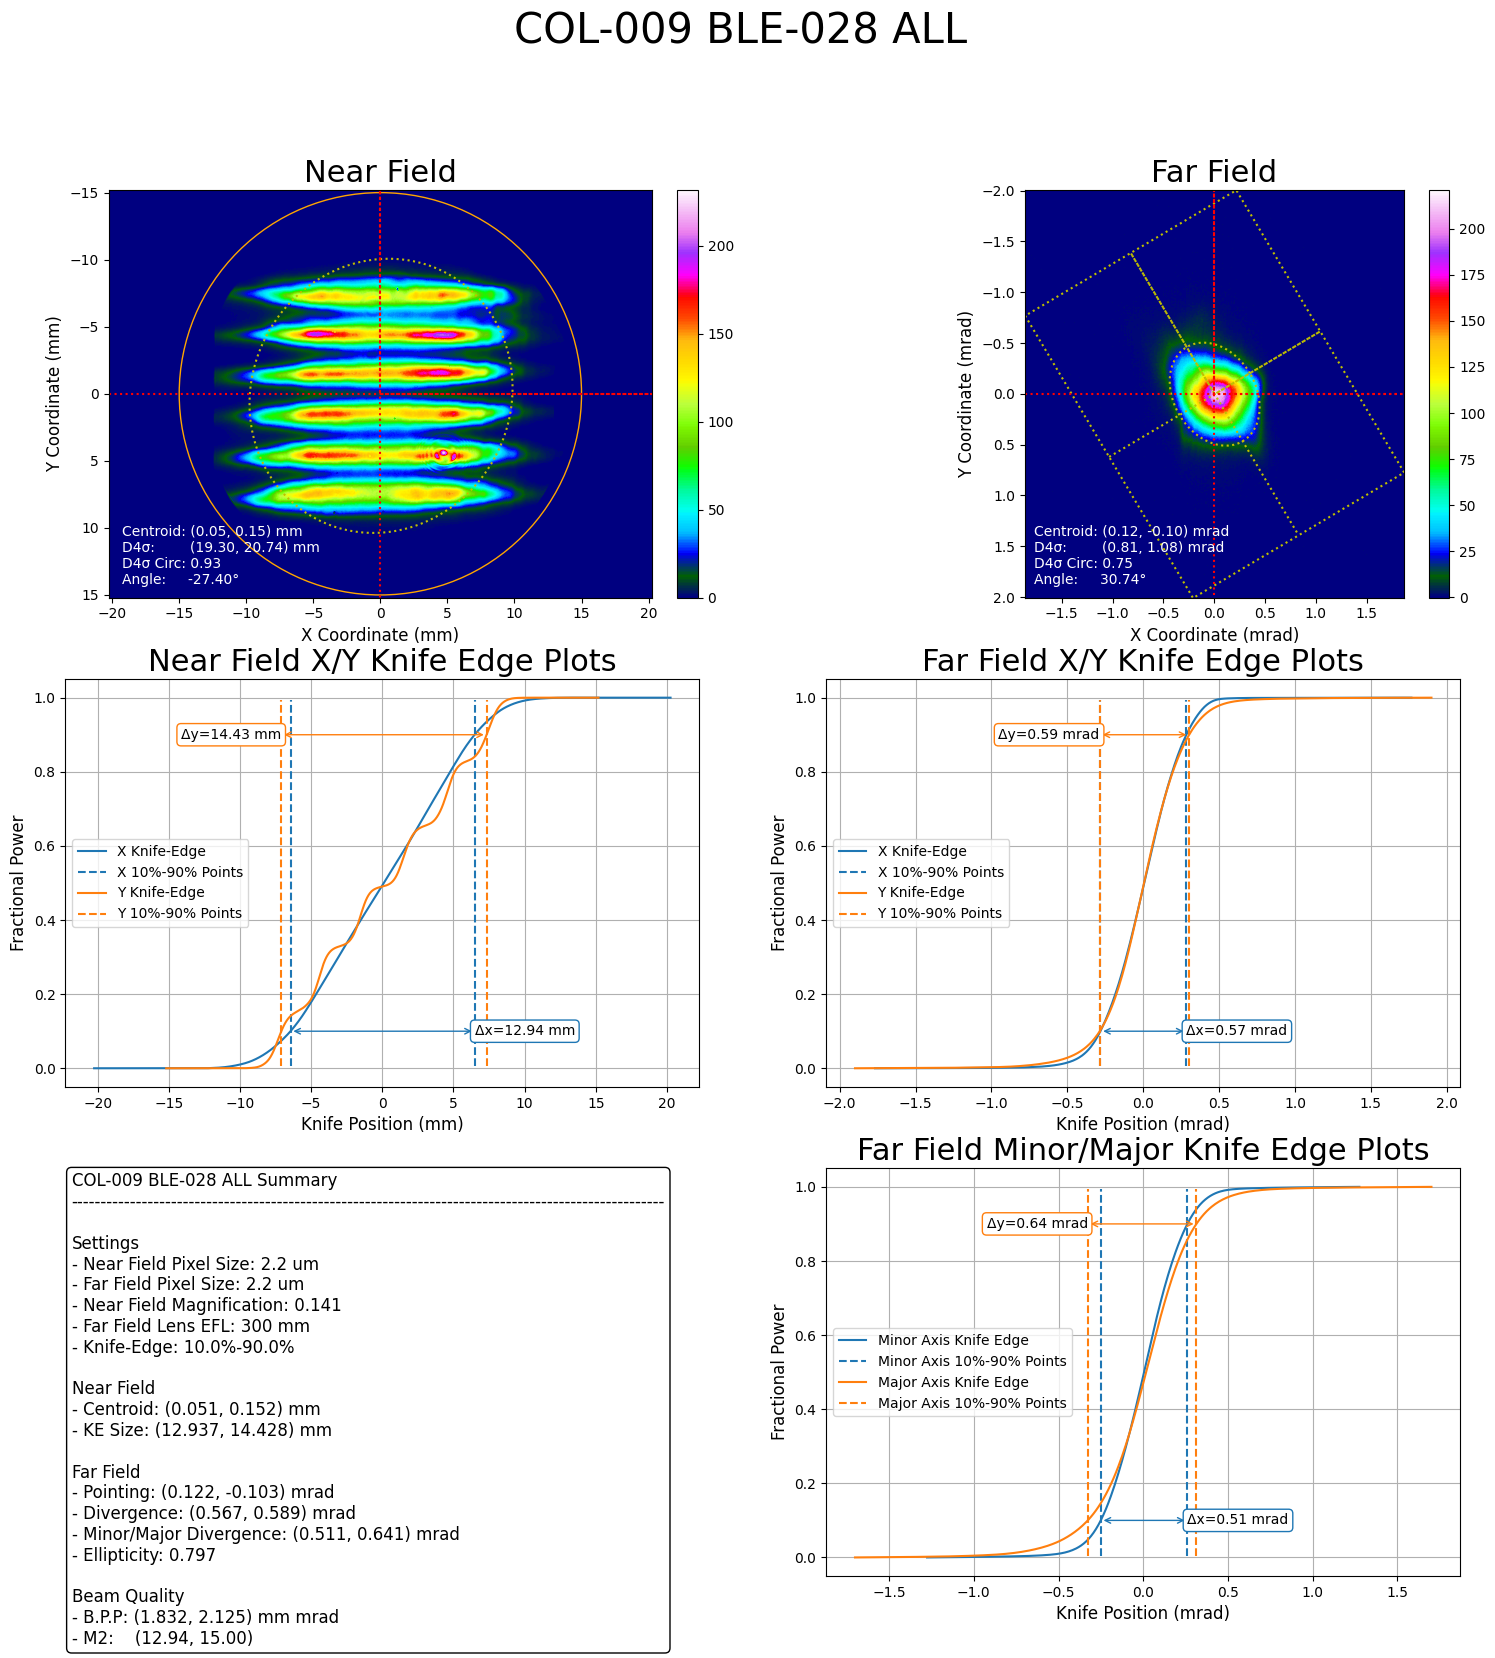

[0.050542374231959286, 0.15184170247340134, 12.936780202954472, 14.428140156230779, 0.1220188132732396, -0.10289814535006148, 0.5665214884631422, 0.5891886262090357, 0.7974471525867771, 0.5113313189700619, 0.6412102887462746, 1.8322409941245696, 2.1252240193502585, 12.93562141851946, 15.004081576612824]


In [3]:
import laserbeamtools as lbt

ch = "ALL"

# Load images into arrays
folder = r'P:/AI Production Data/Beam Expander/BLE0022_BE0005'
ff_img = lbt.load_img(folder+'/BE_{}_FF.bmp'.format(ch))
nf_img = lbt.load_img(folder+'/BE_{}_NF.bmp'.format(ch))

# Run analysis method
results = lbt.near_and_far_profiles(nf_img,
                                    ff_img, 
                                    title='COL-009 BLE-028 {}'.format(ch), 
                                    ff_lens=300,
                                    ff_units='mrad',
                                    ffprecrop=0,
                                    ff_pixel_size=2.2,
                                    nf_pixel_size=2.2,
                                    nfprecrop=0, 
                                    nf_mag=0.1407, 
                                    nf_scale_down=1000, 
                                    nf_units='mm',
                                    save=False,
                                    show_plt=True,
                                    save_name=r"",
                                    kep=[0.10,0.90],
                                    nf_nT=4, ff_nT=4,
                                    ff_int_crop=True)

print(results)

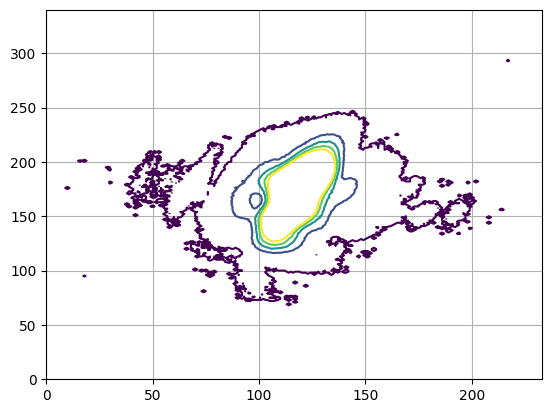

In [46]:
import laserbeamtools as lbt

ch = "ALL"

# Load images into arrays
folder = r'P:/AI Production Data/Beam Expander/BLE0028_BE0009'
ff_img = lbs.load_img(folder+'/BE_{}_FF.bmp'.format(ch))

x, y, dx, dy, phi = lbs.beam_size(ff_img, nT=4)
wimg, x, y  = lbs.crop_image_to_integration_rect(ff_img, x, y, dx, dy, phi)
plt.contour(wimg, levels = [1,25,50,75,100])
plt.grid('on')
